# Word2Vec

In [1]:
text = 'you will never know until you try'

In [2]:
tokens = text.split()

In [3]:
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [87]:
# 순서 유지 Unique_Token
from collections import OrderedDict
categories = list(OrderedDict((element, None) for element in tokens))

In [13]:
X = np.array(tokens).reshape(-1,1)

In [132]:
X

array([['you'],
       ['will'],
       ['never'],
       ['know'],
       ['until'],
       ['you'],
       ['try']], dtype='<U5')

In [138]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'

In [140]:
enc.categories_
word_vec = enc.transform(X).toarray().T
word_vec
data = pd.DataFrame(word_vec, index = enc.categories_)
final_vec = np.matrix(data.T[categories])
final_vec

[array(['know', 'never', 'try', 'until', 'will', 'you'], dtype='<U5')]

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [222]:
# Window 사이즈에 따른 Train Data 생성

# t = window size
def mktraindata(x, t):
    X_data = []
    y_data = []
    for i in range(len(x)):
        for j in range(i-t, i+t+1):
            if j < 0 :
                j = -1
                continue
            if j >= len(x):
                break
            if j != i:
                X_data.append(x[j].getA1())
                y_data.append(x[i].getA1())

    return np.matrix(X_data), np.matrix(y_data)

X_data, y_data = mktraindata(final_vec, 2)

In [228]:
# Hidden Node 수 (차원 수)
H = 4

# Weight (단어벡터)
weight = np.random.random(size = (len(categories), H))

hidden = np.dot(X_data, weight)

In [229]:
weight

array([[0.02211893, 0.42630455, 0.4209864 , 0.61867277],
       [0.54875014, 0.42546305, 0.14392968, 0.58884411],
       [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
       [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
       [0.22956236, 0.95915625, 0.15054935, 0.90198759],
       [0.61908603, 0.0761448 , 0.62405448, 0.30307234]])

In [230]:
hidden

matrix([[0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.22956236, 0.95915625, 0.15054935, 0.90198759],
        [0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.22956236, 0.95915625, 0.15054935, 0.90198759],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.61908603, 0.0761448 , 0.62405448, 0.30307234],
        [0.060

In [231]:
h_weight = np.random.random(size = (H, len(categories)))

In [232]:
h_weight

array([[0.06612453, 0.8997787 , 0.08803106, 0.82032854, 0.46234574,
        0.04382569],
       [0.01938367, 0.68271673, 0.22233605, 0.39805634, 0.45472812,
        0.4567216 ],
       [0.28349581, 0.23045068, 0.93611008, 0.31076321, 0.48861083,
        0.35222468],
       [0.60177987, 0.52063727, 0.98086305, 0.02832953, 0.52906135,
        0.64855825]])

In [233]:
output = np.dot(hidden, h_weight)

In [234]:
output

matrix([[0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],
        [0.50137865, 0.73006809, 1.09765289, 0.33619181, 0.73709362,
         0.745199  ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],
        [0.56715128, 0.96641294, 1.26776674, 0.47238036, 0.91832354,
         0.91360002],
        [0.50137865, 0.73006809, 1.09765289, 0.33619181, 0.73709362,
         0.745199  ],
        [0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.56715128, 0.96641294, 1.26776674, 0.47238036, 0.91832354,
         0.91360002],
        [0.61924975, 1.36568989, 1.25912069, 0.64245287, 1.09305931,
         1.08614679],
        [0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],

In [235]:
def softmax(a) :
    return np.exp(a) / np.sum(np.exp(a))

In [253]:
result = np.matrix(list(map(softmax, output[:,].getA())))

In [255]:
result

matrix([[0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],
        [0.13401308, 0.16844796, 0.24327966, 0.11360762, 0.16963556,
         0.17101611],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],
        [0.12121114, 0.18069232, 0.24423955, 0.11025139, 0.17220856,
         0.17139704],
        [0.13401308, 0.16844796, 0.24327966, 0.11360762, 0.16963556,
         0.17101611],
        [0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12121114, 0.18069232, 0.24423955, 0.11025139, 0.17220856,
         0.17139704],
        [0.10833854, 0.22853767, 0.20543545, 0.11088172, 0.17400264,
         0.17280399],
        [0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],

In [264]:
y_data.shape

(22, 6)

In [266]:
result.shape

(22, 6)

In [273]:
loss = -np.multiply(y_data, np.log(result)).sum()

In [274]:
loss

40.88144967391233

In [291]:
temp = (result-y_data).dot(h_weight.T)
w_grad = X_data.T.dot(temp)
h_grad = hidden.T.dot(result-y_data)

In [288]:
# weight 업데이트

r = 0.03
weight -= r*w_grad
h_weight -= r*h_grad

array([[0.02211893, 0.42630455, 0.4209864 , 0.61867277],
       [0.54875014, 0.42546305, 0.14392968, 0.58884411],
       [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
       [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
       [0.22956236, 0.95915625, 0.15054935, 0.90198759],
       [0.61908603, 0.0761448 , 0.62405448, 0.30307234]])

In [ ]:
from collections import OrderedDict
categories = list(OrderedDict((element, None) for element in tokens))

In [292]:

weight = np.random.random(size = (len(categories), H))
h_weight = np.random.random(size = (H, len(categories)))

epocks = 10000
r = 0.03

loss_history = []
for epock in range(epocks):
    hidden = np.dot(X_data, weight)
    output = np.dot(hidden, h_weight)
    result = np.matrix(list(map(softmax, output[:,].getA())))

    loss_history.append(-np.multiply(y_data, np.log(result)).sum())

    temp = (result-y_data).dot(h_weight.T)
    w_grad = X_data.T.dot(temp)
    h_grad = hidden.T.dot(result-y_data)

    # weight 업데이트
    weight -= r*w_grad
    h_weight -= r*h_grad

weight

array([[-0.9779249 ,  1.09915553,  0.09763811, -1.60907048],
       [-0.20796545,  1.76795426, -0.59837205,  3.35542916],
       [ 2.8213533 ,  1.14509549, -0.28644311, -0.05722058],
       [ 0.36728865,  0.78118192,  2.8604919 ,  0.8242549 ],
       [-1.11893775, -0.38788495, -1.54111862,  2.1425576 ],
       [ 2.44245287, -2.44017639,  2.07296036,  0.33897258]])

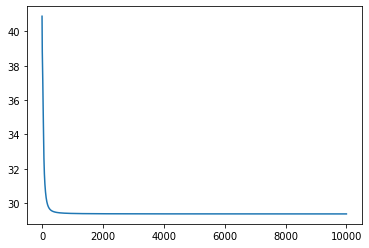

In [293]:
import matplotlib.pyplot as plt 

plt.plot(loss_history)

In [90]:
text = 'you will never know until you try'

In [128]:
vectors

,0,1,2,3
know,2.418918,-3.324329,1.050579,9.610252
never,2.474781,-2.110297,2.785141,2.310004
try,6.735351,-2.399146,-2.483451,-5.587678
until,-17.764967,-0.434003,0.032137,1.705531
will,0.013303,0.156578,0.250370,0.397478
you,14.511025,7.695645,6.542856,-5.225214


In [130]:
cos_sim(vectors.loc['never'], vectors.loc['try'])

0.04166477318618369

In [129]:
cos_sim(vectors.loc['you'], vectors.loc['will'])

0.10503655323134331

In [73]:
# t = window size
def mktraindata(x, t):
    X_data = []
    y_data = []
    for i in range(len(x)):
        temp = []
        for j in range(i-t, i+t+1):
            if j < 0 :
                j = -1
                continue
            if j >= len(x):
                break
            if j != i:
                temp.append(x[j].getA1())
        X_data.append(sum(temp))
        y_data.append(x[i].getA1())

    return np.matrix(X_data), np.matrix(y_data)

def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

# Input 원래 데이터프레임 칼럼 값들
# Input 데이터프레임.loc[index word]
def cos_sim(vec1, vec2):
    a = np.sqrt((np.array(vec1)**2).sum())
    b = np.sqrt((np.array(vec2)**2).sum())
    return float(np.matrix(vec1).dot(np.matrix(vec2).T)/(a * b))

In [74]:
from collections import OrderedDict
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# t = window size


# X_data, y_data = mktraindata(final_vec, 2)

class Word2Vec():
    def __init__(self, H = 4, r = 0.03, t = 2):
        self.H, self.r, self.t = H, r, t
        return

    def mkdatas(self, data):
        tokens = data.split()
        categories = list(OrderedDict((element, None) for element in tokens))
        X = np.array(tokens).reshape(-1,1)
        enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'
        word_vec = enc.fit_transform(X).toarray().T
        df = pd.DataFrame(word_vec, index = enc.categories_)
        final_vec = np.matrix(df.T[categories])
        self.categories = categories
        X_data, y_data = mktraindata(final_vec, self.t)
        return X_data/np.sum(X_data, axis=1), y_data

    def fit(self, X_data, y_data):
        # Hidden Node 수 (차원 수), Learning Rate
        H, r = self.H, self.r

        # Weight (단어벡터)
        weight = np.random.random(size = (len(self.categories), H))
        hidden = np.dot(X_data, weight)

        # h_weight
        h_weight = np.random.random(size = (H, len(self.categories)))

        output = np.dot(hidden, h_weight)
        result = np.matrix(list(map(softmax, output[:,].getA())))
        
        loss_history = []
        loss_history.append(-np.multiply(y_data, np.log(result)).sum())
        print(result)

        epocks = 10000
        for epock in range(epocks):
            temp = (result-y_data).dot(h_weight.T)
            w_grad = X_data.T.dot(temp)
            h_grad = hidden.T.dot(result-y_data)

            # weight 업데이트
            weight -= r*w_grad
            h_weight -= r*h_grad
            
            hidden = np.dot(X_data, weight)
            output = np.dot(hidden, h_weight)
            result = np.matrix(list(map(softmax, output[:,].getA())))

            loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        self.loss_history = loss_history
        self.df = pd.DataFrame(weight, index = self.categories)
        return self.df

    def loss_graph(self):
        plt.plot(self.loss_history)
        plt.title('Loss')
        plt.show()


    def word_sim(self):
        res = []
        for c1 in self.categories:
            for c2 in self.categories:
                res.append(cos_sim(self.df.loc[c1], self.df.loc[c2]))

        return pd.DataFrame(np.asarray(res).reshape(len(self.categories), len(self.categories)), index = self.categories, columns = self.categories)


In [112]:
w2v = Word2Vec()

In [113]:
X_data, y_data = w2v.mkdatas(text)

In [93]:
X_data

matrix([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.        , 0.33333333, 0.33333333, 0.        ,
         0.        ],
        [0.25      , 0.25      , 0.        , 0.25      , 0.25      ,
         0.        ],
        [0.25      , 0.25      , 0.25      , 0.        , 0.25      ,
         0.        ],
        [0.25      , 0.        , 0.25      , 0.25      , 0.        ,
         0.25      ],
        [0.        , 0.        , 0.        , 0.33333333, 0.33333333,
         0.33333333],
        [0.5       , 0.        , 0.        , 0.        , 0.5       ,
         0.        ]])

In [94]:
y_data

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [79]:
w2v.fit(X_data, y_data)

[[0.24211879 0.07506197 0.24366322 0.15412647 0.08005937 0.20497018]
 [0.21485989 0.08825022 0.24097834 0.16067752 0.08436046 0.21087357]
 [0.22707001 0.08030431 0.21998871 0.13738445 0.10017261 0.23507991]
 [0.24012492 0.07410049 0.23013271 0.14097456 0.08979447 0.22487284]
 [0.22858525 0.0817982  0.23631979 0.15329917 0.08628637 0.21371122]
 [0.21658024 0.08230079 0.21659627 0.13387062 0.10285202 0.24780006]
 [0.23695826 0.07278604 0.21626816 0.12830103 0.10021043 0.24547608]]


,0,1,2,3
you,-4.419213,0.451646,0.701685,-3.553528
will,4.048305,2.529602,1.997975,1.916659
never,3.058509,1.324302,-3.206648,-1.993091
know,1.457057,-3.296213,2.999717,-1.909309
until,-1.487479,3.059224,1.918262,2.912529
try,5.089011,-2.487771,-1.221285,3.302776


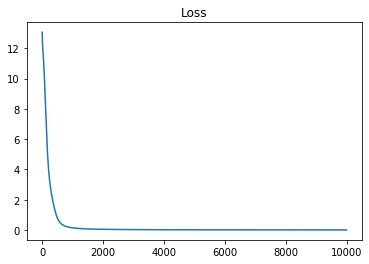

In [174]:
w2v.loss_graph()

In [182]:
w2v.word_sim()

,you,will,never,know,until,try
you,1.000000,-0.635216,-0.283437,0.001055,0.000753,-0.862616
will,-0.635216,1.000000,0.156083,0.020164,0.550050,0.498906
never,-0.283437,0.156083,1.000000,-0.171850,-0.281990,0.724822
know,0.001055,0.020164,-0.171850,1.000000,-0.568860,-0.143462
until,0.000753,0.550050,-0.281990,-0.568860,1.000000,-0.146947
try,-0.862616,0.498906,0.724822,-0.143462,-0.146947,1.000000


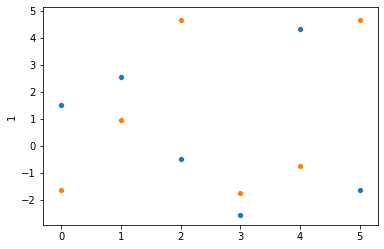

In [193]:
import seaborn as sns
sns.scatterplot([i for i in range(len(w2v.df))], w2v.df[0])
sns.scatterplot([i for i in range(len(w2v.df))], w2v.df[1])

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def visualize(word, n = 3) :
    # 기본 글꼴 변경
    mpl.font_manager._rebuild()
    mpl.pyplot.rc('font', family='NanumBarunGothic')
    words = [item.name for item in w2v.df]
    wvs = [item[0:3] for item in w2v.df]
    tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(wvs)
    labels = words
    plt.figure(figsize=(14, 8))
    plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
        plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

In [15]:
visualize(text.split())

AttributeError: 'int' object has no attribute 'name'

In [177]:
cos_sim(w2v.df.loc['you'], w2v.df.loc['will'])

-0.6352159248788394

In [178]:
cos_sim(w2v.df.loc['never'], w2v.df.loc['try'])

0.7248216473812266

# 대량 Corpus 처리

## Load Data

In [1]:
def search(dirname):
    filenames = os.listdir(dirname)
    fl = []
    for filename in filenames:
        fl.append(os.path.join(dirname, filename))
    
    return fl

# pip install -U nltk

# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

# Stopword 설정
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Data 
folders = search(r'C:\Users\student\Downloads\text') # 대량 Corpus 폴더

files=[]
for f in folders:
    files.extend(search(f))

# Batch Size만큼 뽑아서 사용
batch_size = 100
batch = 0
datas = []
for i, fi in enumerate(files):
    if i == batch_size:
        break
    with open(fi, 'rb') as f:
        datas.append(f.readlines())

In [4]:
len(files)

13864

In [6]:
len(datas)

100

## Tokenizing

In [20]:
from nltk.tokenize import word_tokenize
import re
import itertools

mass_token = []

for data in datas:
    mass_token.extend(itertools.chain(*list(map(lambda i : word_tokenize(re.sub('\<[^<>]*\>','', i.decode())), data))))

In [21]:
len(mass_token)

18971402

In [22]:
mass_token[4]

'political'

In [127]:
# 

In [23]:
def is_stopword(n):
    return True if n not in stop_words else False

mass_token = list(filter(is_stopword, mass_token))

In [24]:
len(mass_token)

12786442

In [25]:
unique_token = list(set(mass_token))

In [26]:
len(unique_token)

383559

## POS Tagging

In [27]:
import nltk

using_pos = [
             'NN', 'NNS', 'NNP', 'NNPS', # 명사
             'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ',  # 동사
             'JJ','JJR','JJS', # 형용사
             'RB','RBR','RBS' # 부사
             ]

def pos(x):
    return True if x[1] in using_pos else False

In [28]:
unique_token = list(filter(pos, nltk.pos_tag(unique_token)))

In [29]:
len(unique_token)

352692

In [54]:
unique_token = list(map(lambda i : i[0], unique_token))

In [57]:
unique_token[:50]

In [ ]:
len(mass_token)

In [30]:
import pandas as pd

In [54]:
token_df = pd.DataFrame(mass_token)

In [55]:
unique_df = pd.DataFrame(unique_token)

In [56]:
token_df.set_index(0, inplace=True)

In [57]:
unique_df.set_index(0, inplace=True)

In [58]:
unique_df[0] = 1

In [59]:
token_df[0] = unique_df[0]

In [60]:
len(token_df)

12786442

In [61]:
token_df.dropna()

,0
0,
Anarchism,1.0
Anarchism,1.0
political,1.0
philosophy,1.0
movement,1.0
...,...
product,1.0
flake,1.0
size,1.0


## 최종 데이터셋

In [62]:
# label X
# index

# Index 기반 탐색
mass_token = list(token_df.dropna().index)
unique_token = list(unique_df.index)
# unique_token.index('Cametá')



In [63]:
import gc
del [[token_df,unique_df]]
gc.collect()
token_df=pd.DataFrame()
unique_df=pd.DataFrame()

In [80]:
len(mass_token)

8987646

In [81]:
len(unique_token)

352692

In [67]:
import numpy as np
H = 4
weight = np.random.random(size=(len(unique_token), H))
h_weight = np.random.random(size=(H, len(unique_token)))

array([[0.08887213, 0.46584621, 0.66002425, 0.82079576],
       [0.2627228 , 0.46925037, 0.53540688, 0.17799407],
       [0.30594653, 0.40844306, 0.16916289, 0.08722768],
       ...,
       [0.65256046, 0.51253452, 0.753715  , 0.40626107],
       [0.84172719, 0.82979004, 0.27889179, 0.29624109],
       [0.80585197, 0.50803566, 0.80344736, 0.7272878 ]])

In [ ]:
# 대량 corpus weight update 방법

# Train Data
# Target에 따라 한번씩 돌기, mass_token Length 만큼 -> Hidden 쌓임
# Weight Update 방법? Mass token에서 Unique Token 주변 데이터 찾아서 해당 weight Update

# X index에 따라 weight가 곱해져서 나오는 Hidden array가 다름
# Y index에 따라 H_weight가 곱해지는 부분이 다르다. 
# 따라서 results = softmax(Weight[X_index] * h_weight * [y_index])

# array 2,4 * 1,4 = 뒤의 값이 각 행에 한번씩 곱해짐

# DataFrame Index기준으로 reset index, number들 가져오고 window size만큼 앞뒤로 단어리스트들 가져오기

# w_grad는 X가 곱해짐, -> 결국 해당 y값에 맞는 

# temp = erorr * h_weight[y_index]
# w_grad = X * temp
# h_grad = hidden * error



In [111]:
from collections import OrderedDict
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# t = window size


# X_data, y_data = mktraindata(final_vec, 2)

class Word2Vec():
    def __init__(self, H = 4, r = 0.03, t = 2):
        self.H, self.r, self.t = H, r, t
        return

    def mkdatas(self, data):
        tokens = data.split()
        categories = list(OrderedDict((element, None) for element in tokens))
        X = np.array(tokens).reshape(-1,1)
        enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'
        word_vec = enc.fit_transform(X).toarray().T
        df = pd.DataFrame(word_vec, index = enc.categories_)
        final_vec = np.matrix(df.T[categories])
        self.categories = categories
        X_data, y_data = mktraindata(final_vec, self.t)
        return X_data/np.sum(X_data, axis=1), y_data

    def fit(self, X_data, y_data):
        # Hidden Node 수 (차원 수), Learning Rate
        H, r = self.H, self.r

        # Weight (단어벡터)
        weight = np.random.random(size = (len(self.categories), H))
        hidden = np.dot(X_data, weight)

        # h_weight
        h_weight = np.random.random(size = (H, len(self.categories)))

        output = np.dot(hidden, h_weight)
        result = np.matrix(list(map(softmax, output[:,].getA())))
        
        loss_history = []
        loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        epocks = 10000
        for epock in range(epocks):
            temp = (result-y_data).dot(h_weight.T)
            w_grad = X_data.T.dot(temp)
            h_grad = hidden.T.dot(result-y_data)

            # weight 업데이트
            weight -= r*w_grad
            h_weight -= r*h_grad
            
            hidden = np.dot(X_data, weight)
            output = np.dot(hidden, h_weight)
            result = np.matrix(list(map(softmax, output[:,].getA())))

            loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        self.loss_history = loss_history
        self.df = pd.DataFrame(weight, index = self.categories)
        return self.df

    def loss_graph(self):
        plt.plot(self.loss_history)
        plt.title('Loss')
        plt.show()


    def word_sim(self):
        res = []
        for c1 in self.categories:
            for c2 in self.categories:
                res.append(cos_sim(self.df.loc[c1], self.df.loc[c2]))

        return pd.DataFrame(np.asarray(res).reshape(len(self.categories), len(self.categories)), index = self.categories, columns = self.categories)


In [114]:
w2v.fit(X_data, y_data)

,0,1,2,3
you,0.188621,-5.811262,1.945990,-0.817591
will,1.362378,3.398039,-0.901919,3.732264
never,-2.081236,0.746408,-2.730229,0.338064
know,-2.458763,2.176786,4.969389,-0.995384
until,4.395924,0.606134,-0.180078,2.506224
try,-3.381923,4.709233,-2.316165,1.423463


In [115]:
w2v.word_sim()

,you,will,never,know,until,try
you,1.000000,-0.740378,-0.472682,-0.070391,-0.161451,-0.850185
will,-0.740378,1.000000,0.182917,-0.129531,0.649243,0.553284
never,-0.472682,0.182917,1.000000,-0.336018,-0.408789,0.768040
know,-0.070391,-0.129531,-0.336018,1.000000,-0.418192,0.145834
until,-0.161451,0.649243,-0.408789,-0.418192,1.000000,-0.245832
try,-0.850185,0.553284,0.768040,0.145834,-0.245832,1.000000


# Word2Vec 패키지

In [123]:
# Input Data = Tokenized Sents List

tokenized_contents = [
    ['발열','은','LTE','폰','의','숙명','ㅠㅠ'], 
    ['HD','촬영','기능','하나','만','으로','도','충분히','만족','하시리','라','봅','니다']
    ]

In [124]:
from gensim.models import Word2Vec
embedding_model = Word2Vec(tokenized_contents, # Input Data
                            size=4, # size = 차원 수
                            window = 2, # window = window size
                            min_count=0, # min_count = 0 (단어 출현 빈도 일정 수 이하 일 시 제외))
                            workers=4, # workers = CPU 사용 수
                            iter=100, # iter = 반복 학습 횟수
                            sg=1 # sg = Skip-Gram
                            )

In [125]:
# 코사인 유사도가 높은 n개 추출
print(embedding_model.most_similar(positive=["LTE"], topn=3))

[('충분히', 0.6511481404304504), ('니다', 0.4862560033798218), ('폰', 0.3899843096733093)]
